標準化特徵是許多機器學習管道的常見預處理步驟。在解釋使用標準化特徵的模型時，通常希望使用原始輸入特徵（而不是其標準化版本）來獲得解釋。本筆記本展示如何使用應用於模型輸入的任何單變量變換都不會影響模型的Shapley 值

In [1]:
! pip install shap

In [2]:
import sklearn
import shap

# Build a linear model that uses standardized features

In [3]:
X, y = shap.datasets.california()
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# standardized
scaler = sklearn.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

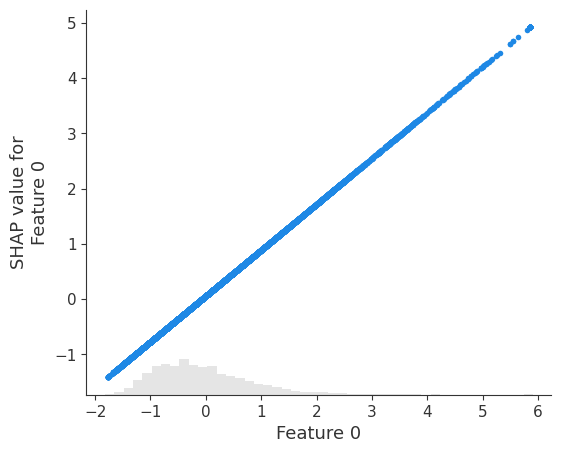

In [5]:
# train model
model = sklearn.linear_model.LinearRegression()
model.fit(X_scaled, y)

# explain model's predictions using shap
explainer = shap.explainers.Linear(model, X_scaled)
shap_values = explainer(X_scaled)

shap.plots.scatter(shap_values[: ,0])

# Original feature space

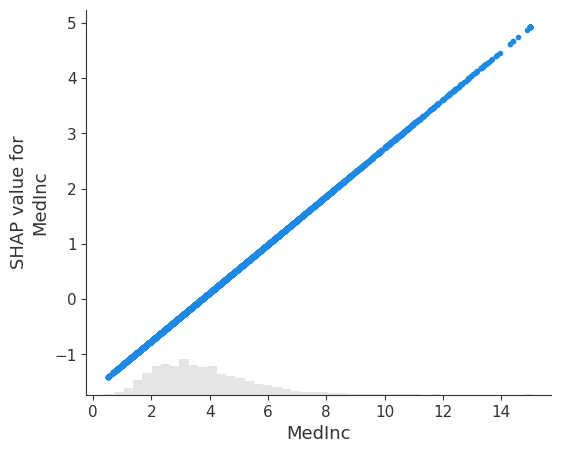

In [6]:
X, y = shap.datasets.california()

# train model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

# explain model's predictions using shap
explainer = shap.explainers.Linear(model, X)
shap_values = explainer(X)

shap.plots.scatter(shap_values[: ,0])

https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Explaining%20a%20model%20that%20uses%20standardized%20features.html